# **Seaborn**

🧠 What is Seaborn?
Seaborn is a high-level data visualization library built on top of Matplotlib.

🔹 Automatically handles color, style, and themes
🔹 Works beautifully with Pandas DataFrames
🔹 Great for statistical plots

What We’ll Cover in Seaborn:
- Distribution Plots
- Categorical Plots
- Matrix Plots
- Regression Plots
- Styling, Themes & Palettes

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt

# 1) **Distribution Plots**

A Distribution Plot shows how the values of a single variable are spread out (distributed) across a range.

📌 Why Use Distribution Plots?
✅ To understand your data shape
✅ To detect outliers or skew
✅ To check for normal distribution
✅ To compare spread of different groups (in later stages)

"Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:"

distplot / histplot

jointplot

pairplot

rugplot



 # What is seaborn.load_dataset()? 

It’s a function that loads pre-installed demo datasets from Seaborn’s library, directly as a Pandas DataFrame ✅

# Load the dataset
 sns.load_dataset("tips")


📂 Common Built-in Datasets:

| Dataset Name | Description                      |
| ------------ | -------------------------------- |
| `tips`       | Restaurant bills and tips        |
| `iris`       | Famous flower dataset            |
| `titanic`    | Titanic passengers survival data |
| `flights`    | Monthly flight passengers data   |
| `diamonds`   | Diamond prices & characteristics |
| `penguins`   | Species, size, sex of penguins   |
| `planets`    | Exoplanet data                   |


In [4]:
df=sns.load_dataset('tips') 
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
df['size'].unique() # this will show the unique value in dataset

array([2, 3, 4, 1, 6, 5])

# Displot / Histplot

 displot() stands for "distribution plot"
It is a figure-level function (not axes-level like histplot()), and it's used to create:

Histograms

KDE plots

Multiple plots using facets (row/column/hue)

## Basic Syntax:

sns.displot(data, x=None, kind='hist', kde=False, bins=None)


##  Difference between displot() and histplot() 

| Feature         | `displot()`                      | `histplot()`              |
| --------------- | -------------------------------- | ------------------------- |
| Level           | Figure-level (returns FacetGrid) | Axes-level (returns Axes) |
| Can make facets | ✅ Yes (hue, row, col)            | ❌ No                      |
| Used for        | More flexible plotting           | Single plot only          |


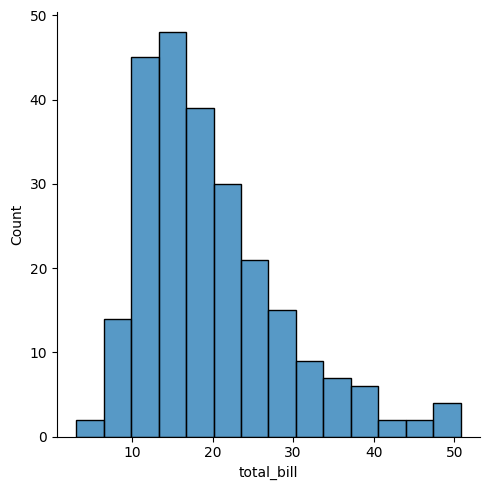

In [8]:
sns.displot(df['total_bill']) # basic histogram

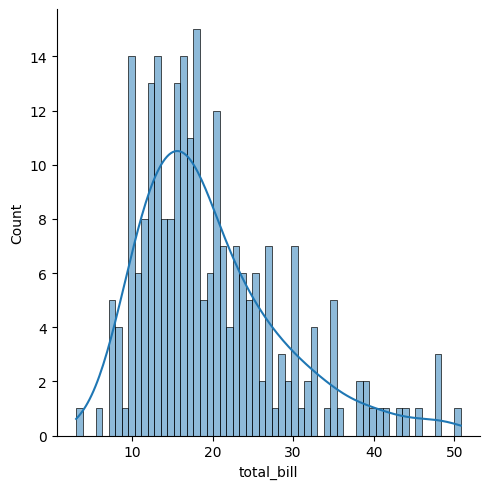

In [11]:
sns.displot(df['total_bill'],kde=True,bins=59)   #with KDE

## 📈 What is KDE (Kernel Density Estimation)?

- KDE stands for Kernel Density Estimation
- It’s a **smooth curve** that estimates the **probability density** of a variable
- Used to visualize data distribution in a more continuous form than a histogram

### 🔹 When to Use:
- To understand where data values are most concentrated
- As an alternative to noisy histograms
- Great for visualizing skewness and distribution shape

### 🔹 Function:
```python
sns.kdeplot(data, fill=True)


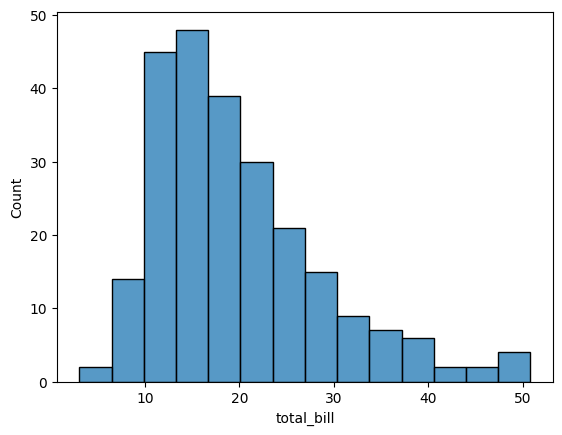

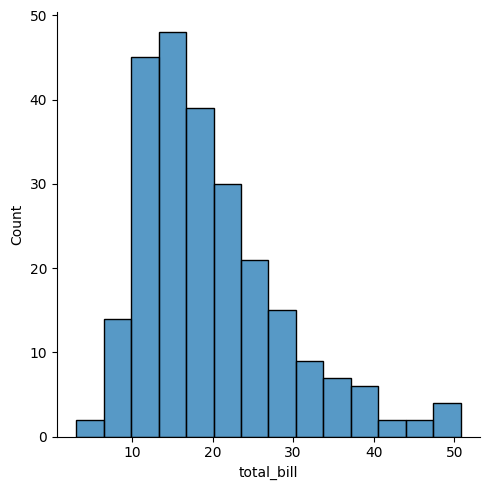

In [13]:
sns.histplot(df['total_bill'])
sns.displot(df['total_bill'])
#✅ Similarity:
#**Both plot the same histogram output.** 
# Both will show the same histogram 📊


## 🔁 histplot() vs displot()

| Feature        | histplot()              | displot() (Figure-level)       |
|----------------|--------------------------|----------------------------------|
| Level          | Axes-level              | Figure-level (returns FacetGrid) |
| Use            | Single plot             | Multiple plots with facetting    |
| Facet support  | ❌ No                   | ✅ Yes (`col`, `row`, `hue`)     |
| Returns        | Axes                    | FacetGrid                        |
| Layout control | Manual with plt         | Auto-managed by seaborn          |

### ✅ Use histplot for simple plots  
### ✅ Use displot for multiple categories or layout



<Axes: xlabel='tip', ylabel='Count'>

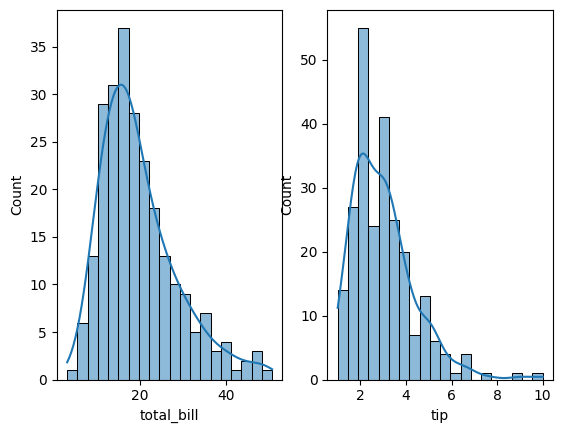

In [14]:
# total_bills and tips on same graph

plt.subplot(1,2,1)
sns.histplot(df['total_bill'],bins=20,kde=True)
plt.subplot(1,2,2)
sns.histplot(df['tip'],bins=20,kde=True)

📌 Use Case: 

Use histplot() for simple histograms or comparisons in plt.subplot()

Use displot() when you want to facet by category (gender, smoker, etc.)



# **Joint plot**

## What is sns.jointplot()?

jointplot() lets you visualize the relationship between two numeric variables, along with their individual distributions. 

     It combines:
Scatter plot in the center

Histogram or KDE on the top and right axes (marginals)

## Syntax: 

**sns.jointplot(x='column1', y='column2', data=df, kind='scatter')**


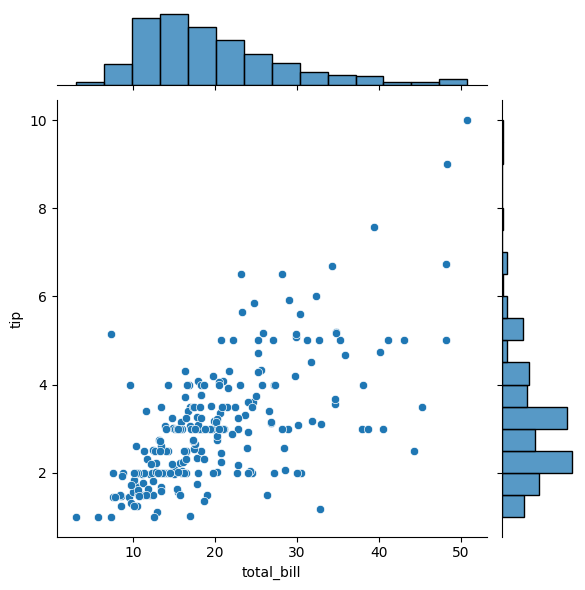

In [16]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='scatter')

## 📍 What is a Scatter Plot?

- A **scatter plot** shows relationship between **two numerical variables**
- Each point represents a single observation (`x`, `y`)
- Used to check **correlation, trend, or patterns**

### ✅ Syntax:
```python
sns.scatterplot(x='col1', y='col2', data=df)
    
🧠 Reminder:
Scatter plot = relationship
Histogram = individual distribution

jointplot(kind='scatter') = scatter + histogram in one view 🎯

## 🔧 jointplot() – Types of `kind`

| kind       | Description                                                         |
|------------|---------------------------------------------------------------------|
| `'scatter'`| (Default) Simple scatter plot with histograms on top & right        |
| `'kde'`    | Smoothed **density estimate plot** (blobs instead of points)        |
| `'hist'`   | Histogram for both variables (no scatter), shows count distributions|
| `'hex'`    | Hexbin plot — **hexagonal bins** colored by data density            |
| `'reg'`    | Scatter plot **+ regression line**, useful for linear relationships |

---





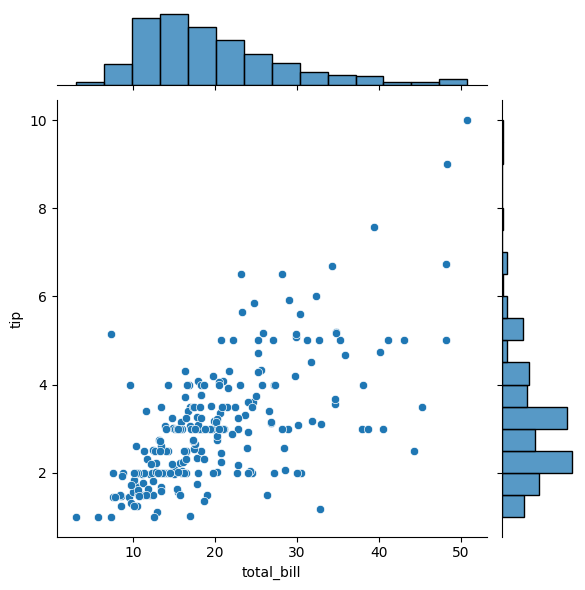

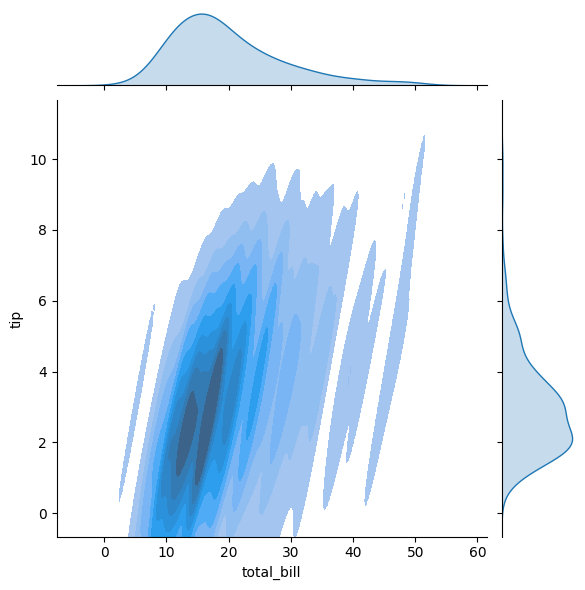

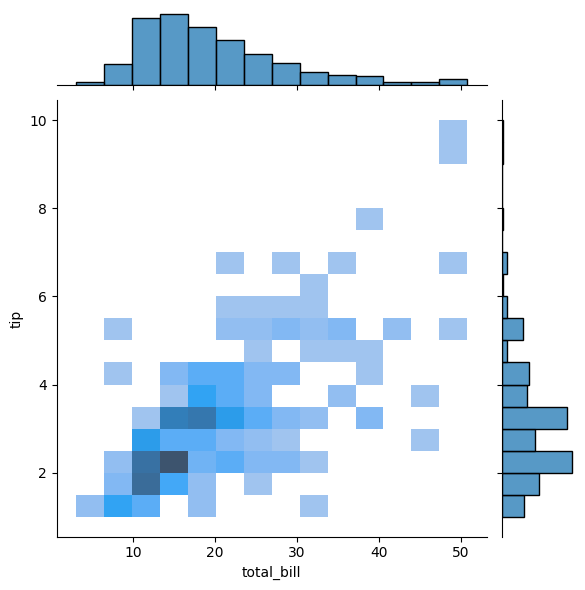

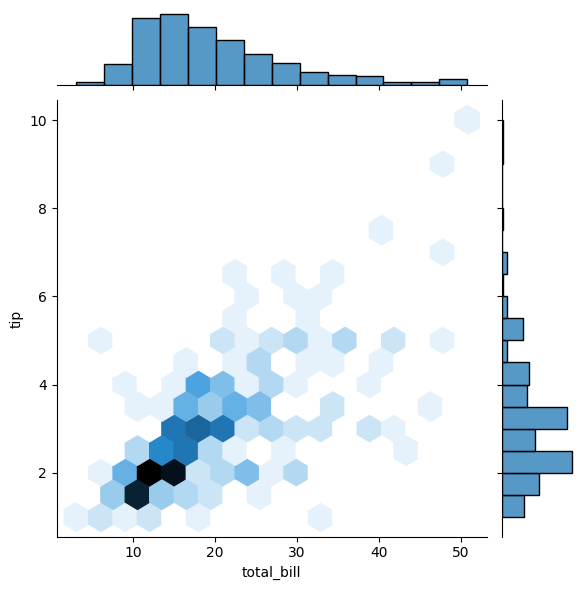

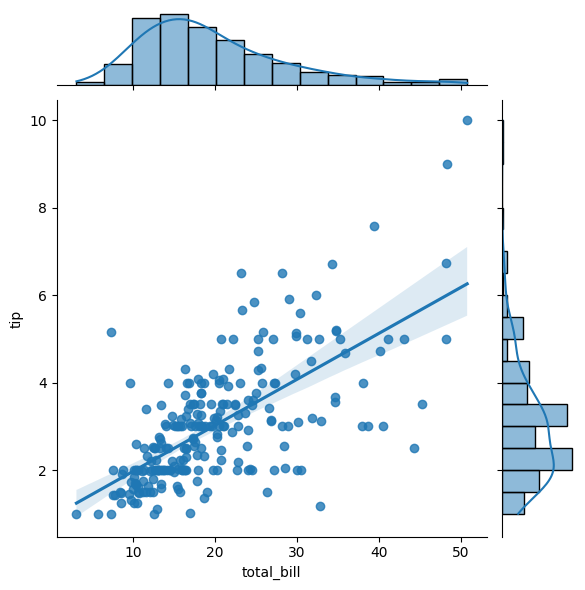

In [17]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='scatter')
sns.jointplot(x='total_bill', y='tip', data=df, kind='kde', fill=True)
sns.jointplot(x='total_bill', y='tip', data=df, kind='hist')
sns.jointplot(x='total_bill', y='tip', data=df, kind='hex')
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')

# Pair Plot 

## 🔗 Seaborn – pairplot()

### ✅ What is it?
- Creates a matrix of scatter plots and histograms for **all numeric columns**
- Great for visualizing **pairwise relationships**
- Adds `hue` to color points by category

### 🔹 Syntax:
```python
sns.pairplot(data, hue='target_column', kind='scatter')


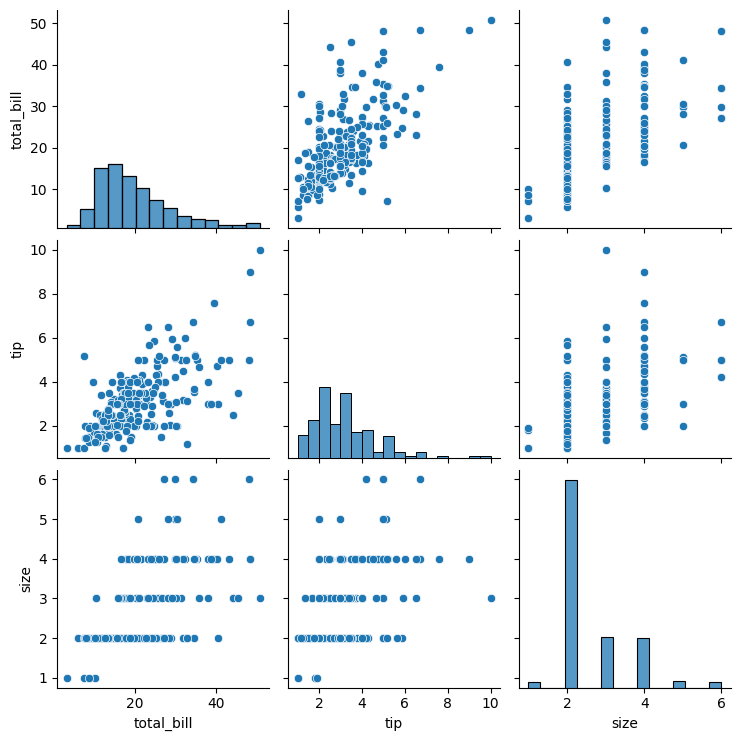

In [18]:
sns.pairplot(df)

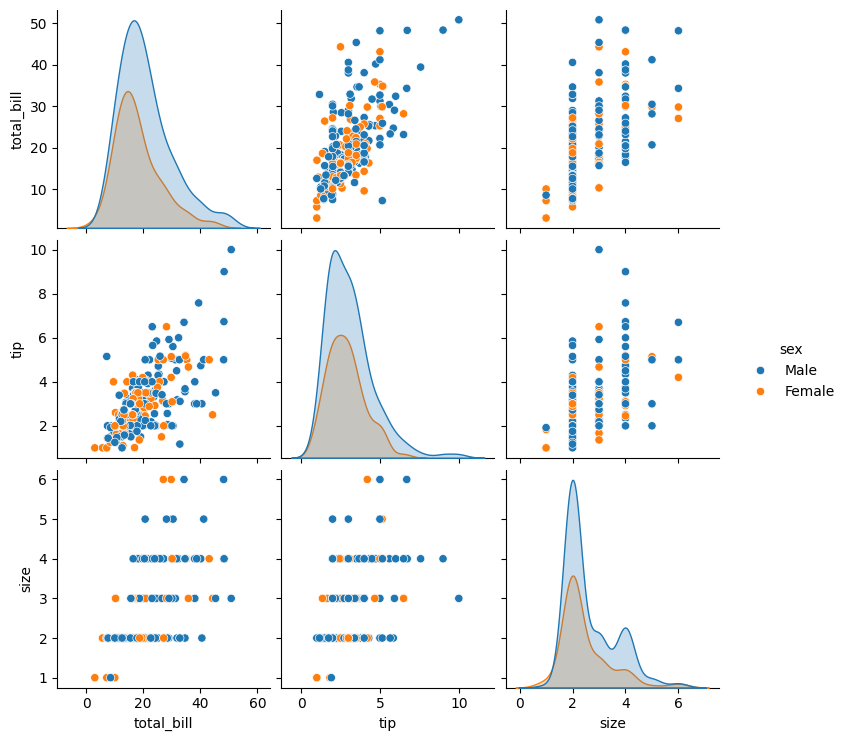

In [19]:
sns.pairplot(df,hue='sex')

## 🎨 What is `hue` in Seaborn?

- `hue` adds **color-based separation** based on a third column (categorical)
- Helps show **how categories differ** in a plot

### ✅ Syntax:
```python
sns.scatterplot(x='col1', y='col2', hue='category_col', data=df)


# Rug plot

## What is rugplot()? 

rugplot() ek line-based visualization hai jo data points ko axis ke along ek chhoti si line (tick) ke form me dikhata hai.

<Axes: xlabel='total_bill'>

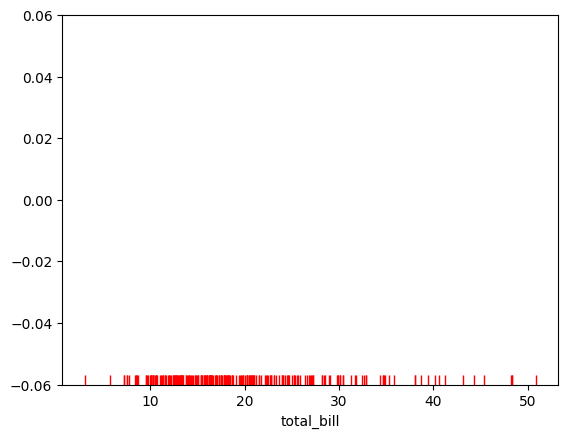

In [21]:
sns.rugplot(df['total_bill'], color='red')

## 📏 Seaborn – rugplot()

### ✅ What is it?
- Shows **individual data points** along an axis as small ticks
- Useful for visualizing **distribution density**
- Often used with KDE or Histogram for better understanding

### 🔹 Syntax:
```python
sns.rugplot(data['col'], height=0.1, lw=1, color='red')

## 📏 Seaborn – rugplot()

### ✅ What is it?
- Shows **individual data points** along an axis as small ticks
- Useful for visualizing **distribution density**
- Often used with KDE or Histogram for better understanding

### 🔹 Syntax:
```python
sns.rugplot(data['col'], height=0.1, lw=1, color='red')


# 📊 Seaborn – Distribution Plots Summary

---

## 1. 📦 histplot()
- Shows frequency using histogram bars
- Supports KDE (smooth line)
```python
sns.histplot(data=df['col'], bins=20, kde=True)
## 2. 📦 displot()
Figure-level version of histplot

Supports multiple categories using hue, row, col
sns.displot(data=df, x='col', kde=True, hue='target', kind='hist')

## 3. 📈 kdeplot()
Plots smooth curve of distribution

Use fill=True to shade the area

sns.kdeplot(df['col'], fill=True)

## 4. 📏 rugplot()
Shows actual data points as tiny ticks on axis

Used with kdeplot() to see real values

sns.kdeplot(df['col'])
sns.rugplot(df['col'], color='red')

## 5. 🔗 jointplot()
Combines scatter + hist/kde in 1 graph

Great for seeing correlation + distributions
sns.jointplot(x='col1', y='col2', data=df, kind='scatter')  # Other kinds: 'kde', 'hex', 'reg'

## 6. 🧬 pairplot()
Matrix of scatter plots & histograms

Shows all pairwise relationships

sns.pairplot(df, hue='target')

🎨 hue
Adds color grouping by a category

sns.scatterplot(x='col1', y='col2', hue='category', data=df)





✅ Completed: Seaborn Distribution Plots
💪 "Consistency turns confusion into clarity."

📊 From basic histograms to powerful pairplots,
you've learned to read your data visually and meaningfully.
Your graph isn't just a picture — it's a story your data tells.

🌱 Keep learning, keep plotting — you're turning data into direction!
One step at a time, you're becoming a data wizard! 🧙‍♂️✨